### Collection Level OpenSea API

In [ ]:
import requests
import pandas as pd
import hvplot.pandas
import plotly.express as px
import panel as pn


In [126]:
# class to pull data from collection level opensea api
# must cast query url to variable url
# url = 'https://api.opensea.io/api/v...'

class openseacollection:
    def __init__ (self, url):
        self.url = url   #assign query url to "self.url"
        self.get_data()  #run get_data method
        self.get_attributes() #run get attribute method
#         self.collection = self.collection()

    def get_data(self):
        self.data = requests.request("GET", self.url).json() #assign query json to "self.data"

    def get_attributes(self): # run functions for each attribute
        self.num_sales = [x['num_sales'] for x in self.data['assets']]
        self.token_id = [x['token_id'] for x in self.data['assets']]
        self.name = [x['name'] for x in self.data['assets']]
        self.last_sale = [x['last_sale'] for x in self.data['assets']]
        self.project_des = self.data['assets'][0]['asset_contract']['description']

    def as_df(self): # cast attributes into df
        return pd.DataFrame({'Token ID':self.token_id,'Name':self.name})
    
#     def collection(self):
#         return pn.pane.Str(self.project_des)
         

#     def name(self):
#         return pn.pane.Str(self.name)
        

#     def number_sales(self):
#         return pn.pane.Str(self.num_sales)
             
    
#     def dashboard_temp(self):
#         dashboard = pn.Column(collection,
#                     name,
#                     number_sales,
#                     floor_px,
#                     nft_count,
#                      )
#         return dashboard

In [127]:
url = 'https://api.opensea.io/api/v1/assets?asset_contract_address=0x4f89Cd0CAE1e54D98db6a80150a824a533502EEa&order_direction=desc&offset=0&limit=20'

In [ ]:
osc = openseacollection(url)
osc.dashboard_temp()

### Single Item OpenSea API

In [ ]:
import requests
import pandas as pd

In [77]:
class OpenSeaItem:
    def __init__ (self, url):
        self.url = url   #assign query url to "self.url"
        self.get_data()  #run get_data method
        self.get_attributes() #run get attribute method

    def get_data(self):
        self.data = requests.request("GET", self.url).json() #assign query json to "self.data"

    def get_attributes(self):
        self.asset_image = self.data['image_thumbnail_url']
        self.currency_data = self.data['collection']['payment_tokens']
        self.floor_price = self.data['collection']['stats']['floor_price']
        self.total_supply = self.data['collection']['stats']['total_supply']
        self.traits = [x['trait_type'] for x in self.data['traits']]
        self.collection_name = self.data['collection']['name']
        
    
    # def as_df(self):
    #   return pd.DataFrame({'Token ID':self.token_id,'Name':self.name})

In [78]:
url = 'https://api.opensea.io/api/v1/asset/0x4f89Cd0CAE1e54D98db6a80150a824a533502EEa/7089/'

os1 = OpenSeaItem(url)
os1.floor_price

1.1

### NBA TopShot OTM Module

In [7]:
# imports

import panel as pn
# import os
import hvplot.pandas
# import requests
import pandas as pd
# from dotenv import load_dotenv
# import requests
from panel.interact import interact
from panel import widgets
# import numpy as np

In [12]:
class nba:
    def __init__ (self, csv):
        self.csv = csv #assign csv to the class
        self.clean_csv() #run data cleaning
        self.get_attributes() #run get_attributes
#         self.value_plot()
#         self.player_pricing()
#         self.serial_price()
        self.player_txn_count()
#         self.dash()
        
        
        
    def clean_csv(self):
        df = pd.read_csv(self.csv,infer_datetime_format=True,parse_dates=True, index_col='Transaction Date')
        df.index = df.index.date
        df.sort_index(inplace=True)
        self.df = df
        
    def player_txn_count(self):
        number_of_transactions_df = self.df.groupby('Player Name').count().filter(['Player Name','Set'])
        number_of_transactions_df.columns = ['Transaction Count']
        number_of_transactions_df.sort_values('Transaction Count',inplace=True,ascending=False)
        self.player_txn_count = number_of_transactions_df
        
    def ptc_plot(self):
        return self.player_txn_count.hvplot.bar(rot=90,color='green')
            
    def get_attributes(self):
        self.price_avg = self.df['Purchase Price'].mean
        self.buyer = self.df.groupby('Buyer').size

    def value_plot(self):
        return self.df.hvplot.line()
    
    def serial_price(self):
        return self.df.hvplot.scatter(x='Serial', y='Purchase Price', groupby = 'Player Name')
    
    def player_pricing(self):
        return self.df.hvplot.line(y='Purchase Price',groupby='Player Name')
    
    def dash(self):
        dashboard_title = "NBA TopShot Evaluator"
        welcome_message = "This is our NBA TopShot Evaluator.  Our mission is to help collectors value their NFT portfolios and identify opportunities."
        serial_findings = "We observe a correlation between low serial number and higher prices. With the current portfolio eval tools, an investors portfolio will not be accurately represented if they own low serials. Evaluation tools simply take the floor price of moments, and use that to determine portfolio value, leading to "
        all_star_icon = pn.pane.PNG('2021allstar.png', height=100, width=100)

        welcome_column = pn.Column(
            dashboard_title,
            welcome_message,
            all_star_icon
#             '2021 All Star Set Value',set_value()            
        )

#         floor_column = pn.Column(
#             all_star_icon,
#             'Player Floor',player_floor(),
#             'Historal Prices by Player', player_pricing()
# )

        serial_column = self.serial_price
    
        tabs = pn.Tabs(
            ("Welcome",welcome_column),
#             ("2021 All Star Pricing",floor_column),
            ("Serial Number/Price",serial_column)
        
        )
        
        return tabs


In [13]:
csv = '2021allstar.csv'

In [14]:
test = nba(csv)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] PNG(str, height=100, sizing_mode='fixed', width=100)
    [1] Str(method, name='Serial Number/Price')
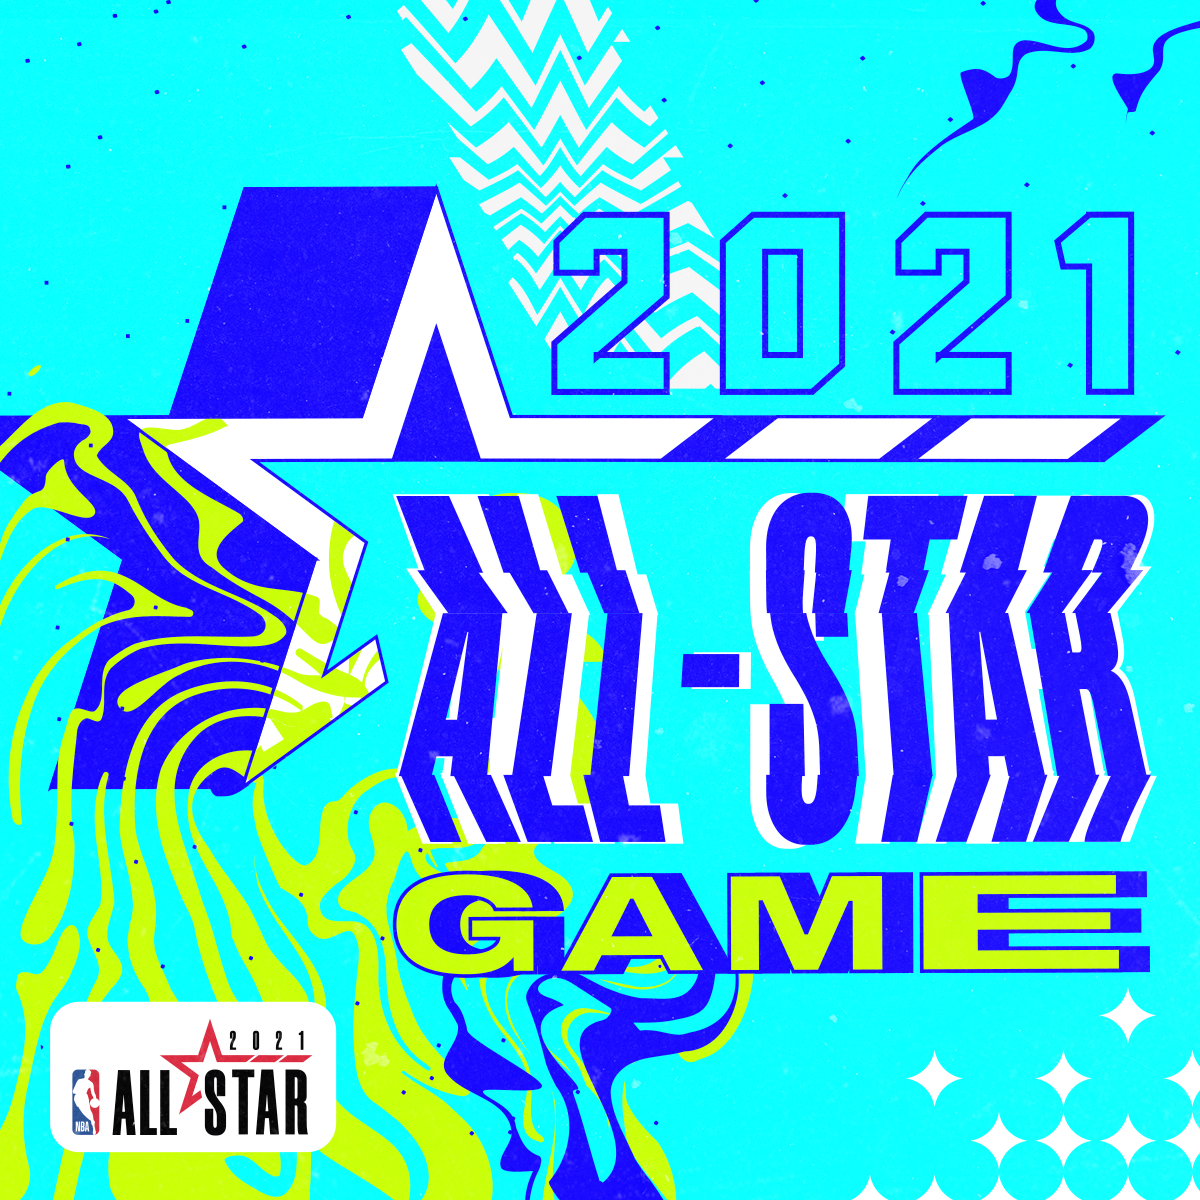

In [16]:
test.dash()